In [1]:
!nvidia-smi

Sat Jan 28 03:31:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P0    21W /  87W |    993MiB /  8192MiB |     24%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# from tensorflow.keras.utils import plot_model
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import *
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
w, h = 32, 32
train_images = train_images.reshape(train_images.shape[0], w, h, 3)
test_images = test_images.reshape(test_images.shape[0], w, h, 3)

In [6]:
classess = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classess_text = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',\
         'frog', 'horse', 'ship', 'truck']

In [7]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(32, 32, 3), name="input_layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(len(classess), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [9]:
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [10]:
history = model.fit(train_images, 
                    train_labels,
                    batch_size = 256,
                    validation_split=0.15,
                    epochs = 30
)

Epoch 1/30
167/167 [==============================] - 19s 40ms/step - loss: 1.8013 - accuracy: 0.3884 - val_loss: 1.5663 - val_accuracy: 0.4451
Epoch 2/30
167/167 [==============================] - 4s 25ms/step - loss: 1.5291 - accuracy: 0.4704 - val_loss: 1.4377 - val_accuracy: 0.5053
Epoch 3/30
167/167 [==============================] - 4s 24ms/step - loss: 1.4427 - accuracy: 0.4988 - val_loss: 1.3793 - val_accuracy: 0.5227
Epoch 4/30
167/167 [==============================] - 4s 23ms/step - loss: 1.3964 - accuracy: 0.5120 - val_loss: 1.3462 - val_accuracy: 0.5321
Epoch 5/30
167/167 [==============================] - 4s 25ms/step - loss: 1.3626 - accuracy: 0.5267 - val_loss: 1.3099 - val_accuracy: 0.5477
Epoch 6/30
167/167 [==============================] - 4s 26ms/step - loss: 1.3329 - accuracy: 0.5370 - val_loss: 1.3007 - val_accuracy: 0.5456
Epoch 7/30
167/167 [==============================] - 4s 24ms/step - loss: 1.3157 - accuracy: 0.5419 - val_loss: 1.2792 - val_accuracy: 0.554

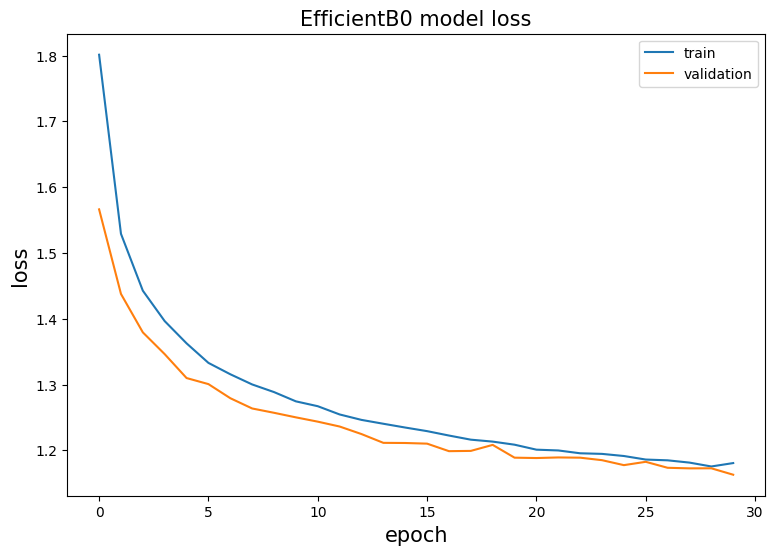

In [11]:
# Loss
plt.figure(figsize = (9, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientB0 model loss', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

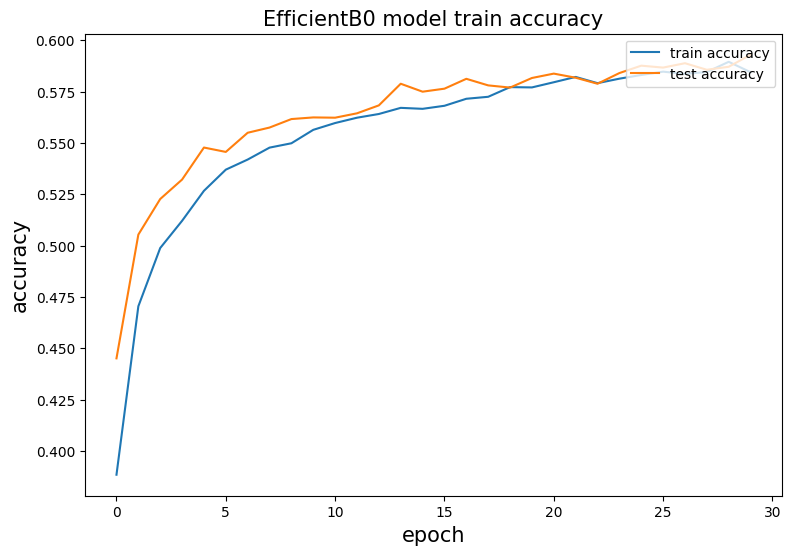

In [12]:
# Accuracy
plt.figure(figsize = (9, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EfficientB0 model train accuracy', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.legend(['train accuracy', 'test accuracy'], loc = 'upper right')
plt.show()

In [13]:
predictions = model.predict(test_images)

In [14]:
test_labels = np.argmax(test_labels, axis = 1)
test_labels

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [15]:
train_images = train_images.reshape(train_images.shape[0], w, h, 3)
test_images = test_images.reshape(test_images.shape[0], w, h, 3)


# Cifar's label need to reshape to scalar array
test_labels = test_labels.reshape(10000, )



# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classess_text[predicted_label],
                                100*np.max(predictions_array),
                                classess_text[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

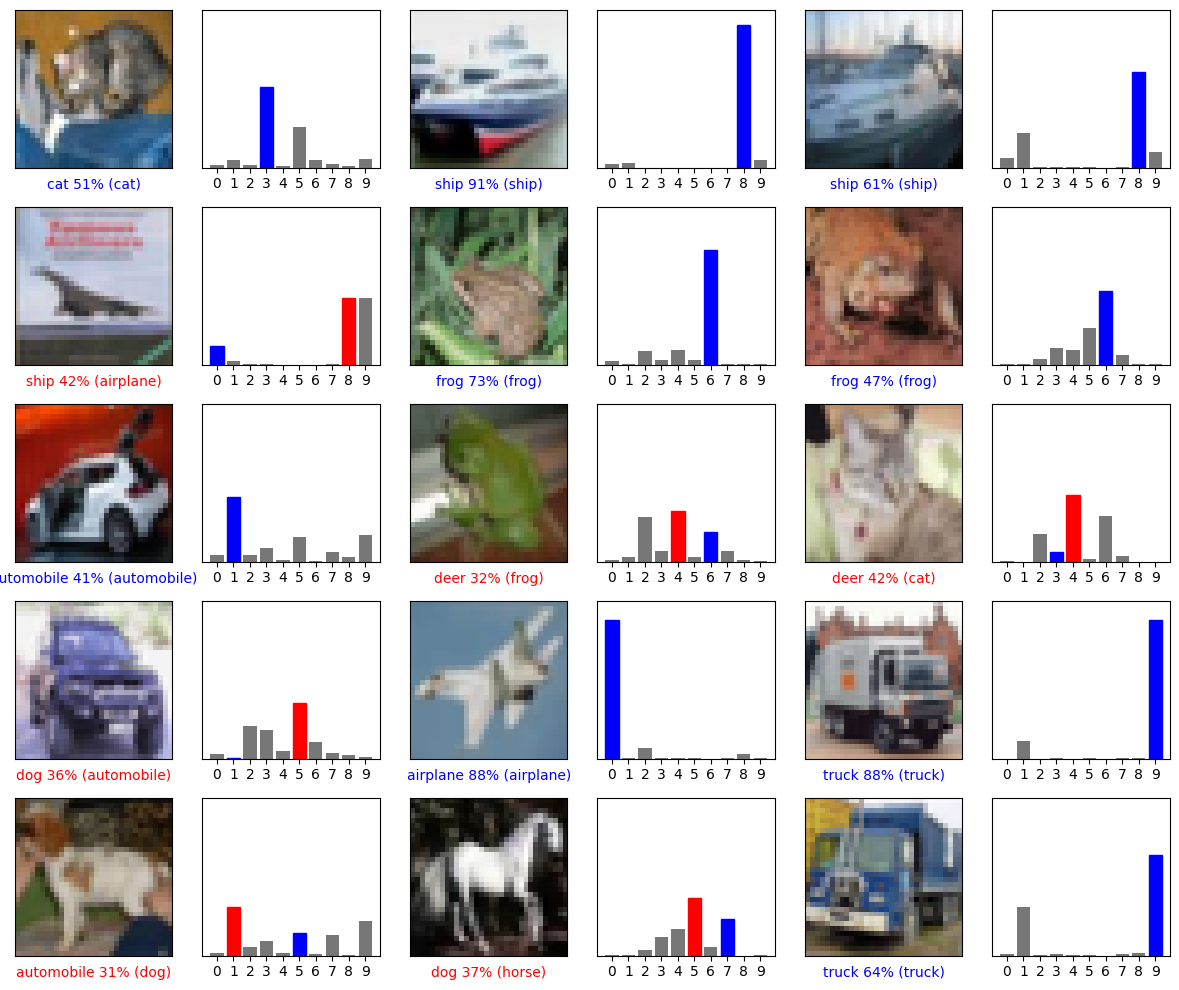

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Fine-Tuning Model

In [17]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-50]:
  layer.trainable = False

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
              metrics=["accuracy"])

In [18]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 2,539,674
Non-trainable params: 1,522,707
_________________________________________________________________


In [20]:
for layer in model.layers:
  print(layer.trainable)

True
True
True
True


In [21]:
history_tunning = model.fit(train_images, 
                    train_labels,
                    batch_size = 256,
                    validation_split=0.15,
                    epochs = 30
)

Epoch 1/30
167/167 [==============================] - 11s 30ms/step - loss: 4.3408 - accuracy: 0.2806 - val_loss: 1.9702 - val_accuracy: 0.4292
Epoch 2/30
167/167 [==============================] - 4s 22ms/step - loss: 2.0143 - accuracy: 0.4403 - val_loss: 1.6719 - val_accuracy: 0.4983
Epoch 3/30
167/167 [==============================] - 4s 22ms/step - loss: 1.6011 - accuracy: 0.4926 - val_loss: 1.4903 - val_accuracy: 0.5240
Epoch 4/30
167/167 [==============================] - 4s 22ms/step - loss: 1.4307 - accuracy: 0.5217 - val_loss: 1.3776 - val_accuracy: 0.5427
Epoch 5/30
167/167 [==============================] - 4s 21ms/step - loss: 1.3378 - accuracy: 0.5475 - val_loss: 1.3226 - val_accuracy: 0.5560
Epoch 6/30
167/167 [==============================] - 4s 22ms/step - loss: 1.2725 - accuracy: 0.5625 - val_loss: 1.2744 - val_accuracy: 0.5697
Epoch 7/30
167/167 [==============================] - 4s 22ms/step - loss: 1.2109 - accuracy: 0.5785 - val_loss: 1.2427 - val_accuracy: 0.577

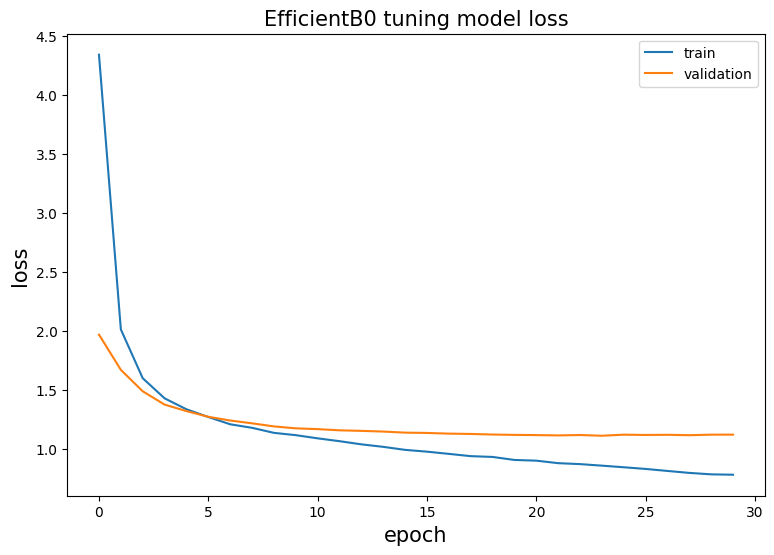

In [22]:
# Loss
plt.figure(figsize = (9, 6))
plt.plot(history_tunning.history['loss'])
plt.plot(history_tunning.history['val_loss'])
plt.title('EfficientB0 tuning model loss', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

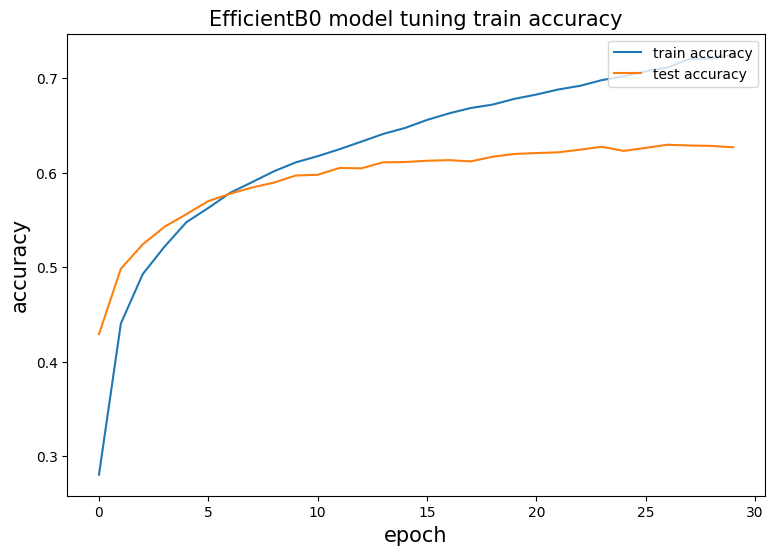

In [23]:
# Accuracy
plt.figure(figsize = (9, 6))
plt.plot(history_tunning.history['accuracy'])
plt.plot(history_tunning.history['val_accuracy'])
plt.title('EfficientB0 model tuning train accuracy', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.legend(['train accuracy', 'test accuracy'], loc = 'upper right')
plt.show()

In [24]:
predictions = model.predict(test_images)

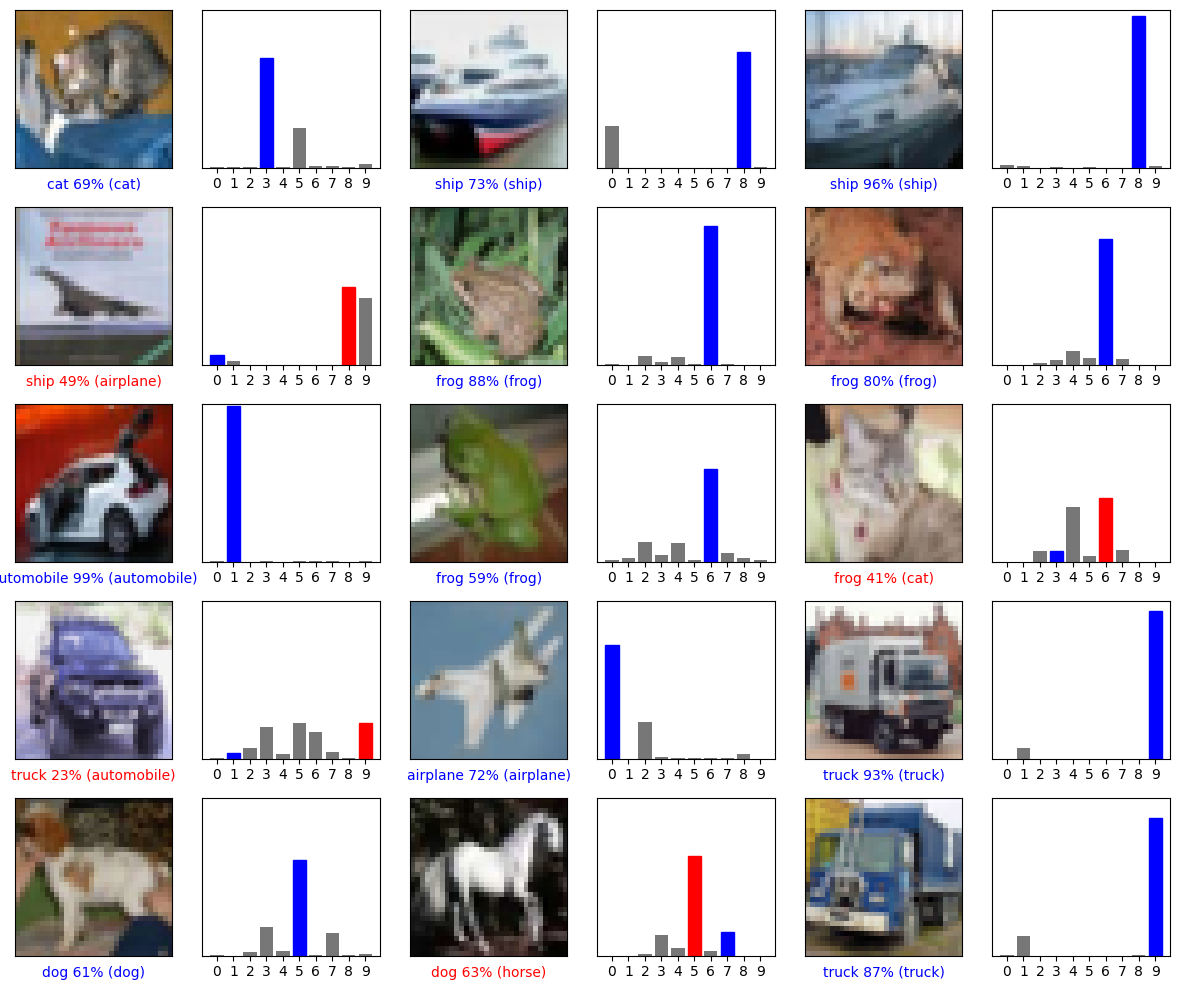

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()